## Majid Feiz 
## Alzheimer-Disease-Data-Analysis 
### Linear Regression, Pearson Correlation and Heat map

### Scatter Plot with Pearson Correlation Coefficient

#### Step 1

In [47]:
Data_File_Path ='C:/Users/Owner/Documents/Majid/UConn/Data_Visualization/Data_file/'
Data_alzFe = pd.read_csv(Data_File_Path + 'GSE44768_CR_alz_female_reduced.csv')
Data_alzFe.head()

,GSM_ID,disease,age,gender,pmi,pH,rin,pres,batch,tissue,...,DTL,UBE2C,BUB1,RFX4,DGCR6,AQP4,MT1M,AMPD1,EGR2,PDGFB
0,GSM1090268,A,90,F,12.60,6.164,6.3,LNV,1,brain,...,0.008948,0.009005,0.124712,0.129920,0.262155,-0.133542,0.256252,0.037935,-0.347338,0.045741
1,GSM1090271,A,90,F,9.25,6.057,6.7,LNV,1,brain,...,-0.016638,0.053465,-0.044457,0.082901,0.054048,0.193930,0.237436,0.076833,-0.440042,0.081575
2,GSM1090272,A,77,F,6.86,6.793,7.2,LNV,1,brain,...,0.332830,0.195650,0.203180,-0.156819,-0.077294,-0.180468,-0.128067,0.050049,-0.150672,0.069818
3,GSM1090274,A,100,F,24.28,6.576,7.1,LNV,1,brain,...,-0.031214,0.021954,-0.032470,0.032545,0.308341,0.191308,0.662724,-0.036906,-0.119441,0.252757
4,GSM1090276,A,89,F,13.80,6.145,6.4,LNV,1,brain,...,0.001323,0.094361,-0.004207,0.150745,0.272414,0.220450,0.019569,0.093613,-0.000378,0.222436


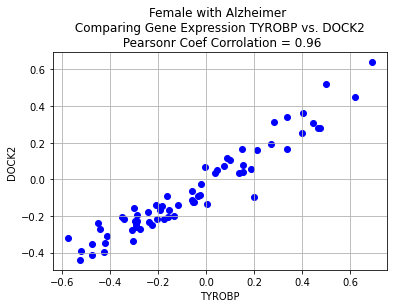

In [48]:
from scipy.stats import pearsonr
plt.scatter(Data_alzFe.TYROBP, Data_alzFe.DOCK2, color  = 'blue')
plt.grid(True)
plt.xlabel('TYROBP');plt.ylabel('DOCK2')
CorrTyrobp_Dock2, _ = pearsonr(Data_alzFe.TYROBP, Data_alzFe.DOCK2)
#print(coef)
plt.title('Female with Alzheimer \n Comparing Gene Expression TYROBP vs. DOCK2 \n Pearsonr Coef Corrolation = {0:.2F}'.format(CorrTyrobp_Dock2));

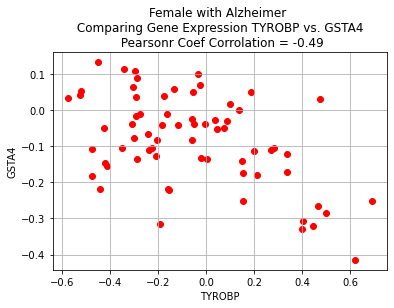

In [49]:
plt.scatter(Data_alzFe.TYROBP, Data_alzFe.GSTA4, color='red')
plt.xlabel('TYROBP');plt.ylabel('GSTA4')
plt.grid(True)
CorrTyrobp_GSTA4, _ = pearsonr(Data_alzFe.TYROBP, Data_alzFe.GSTA4)
plt.title('Female with Alzheimer \n Comparing Gene Expression TYROBP vs. GSTA4 \n Pearsonr Coef Corrolation = {0:.2F}'.format(CorrTyrobp_GSTA4));

#### Step 2

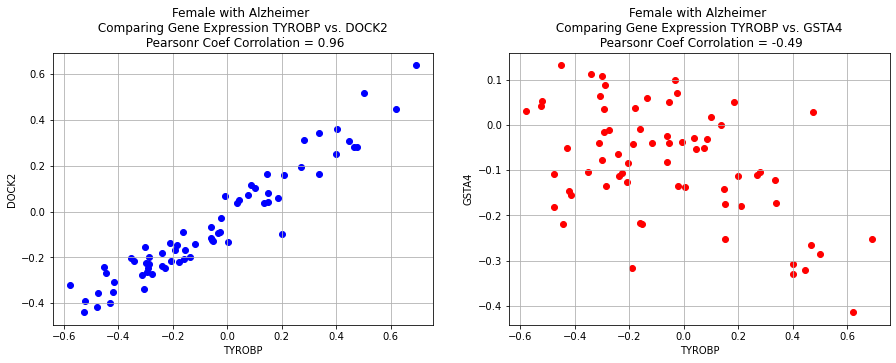

In [50]:
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1,2), (0,0))
ax1.grid(True)
ax1.set_xlabel('TYROBP');ax1.set_ylabel('DOCK2')
CorrTyrobp_Dock2, _ = pearsonr(Data_alzFe.TYROBP, Data_alzFe.DOCK2)
ax1.set_title('Female with Alzheimer \n Comparing Gene Expression TYROBP vs. DOCK2 \n Pearsonr Coef Corrolation = {0:.2F}'.format(CorrTyrobp_Dock2),fontsize=12);

ax2 = plt.subplot2grid((1,2), (0,1)) 
ax1.scatter(Data_alzFe.TYROBP, Data_alzFe.DOCK2, color  = 'blue')
ax2.scatter(Data_alzFe.TYROBP, Data_alzFe.GSTA4, color='red')
ax2.set_xlabel('TYROBP');ax2.set_ylabel('GSTA4')
ax2.grid(True)
CorrTyrobp_GSTA4, _ = pearsonr(Data_alzFe.TYROBP, Data_alzFe.GSTA4)
ax2.set_title('Female with Alzheimer \n Comparing Gene Expression TYROBP vs. GSTA4 \n Pearsonr Coef Corrolation = {0:.2F}'.format(CorrTyrobp_GSTA4),fontsize=12);

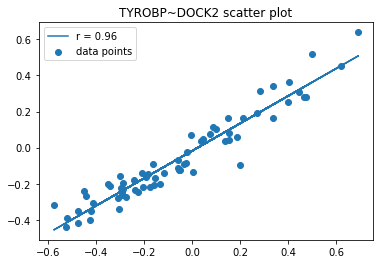

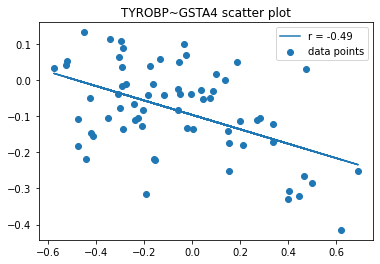

In [51]:
#df = pd.read_csv("./GSE44768_CR_alz_female_reduced.csv")
df = Data_alzFe 
TYROBPvalue = df["TYROBP"]
DOCK2value = df["DOCK2"]
GSTA4value = df["GSTA4"]
w, b = np.polyfit(TYROBPvalue, DOCK2value, 1)
r = stats.pearsonr(TYROBPvalue,DOCK2value)[0]
plt.plot(TYROBPvalue, w*TYROBPvalue + b,label="r = "+str(round(r,2)))
plt.scatter(TYROBPvalue,DOCK2value,label="data points")
plt.title("TYROBP~DOCK2 scatter plot")
plt.legend()
plt.show()
w, b = np.polyfit(TYROBPvalue, GSTA4value, 1)
r = stats.pearsonr(TYROBPvalue,GSTA4value)[0]
plt.plot(TYROBPvalue, w*TYROBPvalue + b,label="r = "+str(round(r,2)))
plt.scatter(TYROBPvalue,GSTA4value,label="data points")
plt.title("TYROBP~GSTA4 scatter plot")
plt.legend()
plt.show()

### Part III: Correlation Matrix and Heatmap

#### Step 1

In [52]:
Data_alzFe.columns
excluding_list = Data_alzFe.columns.get_indexer(["TYROBP", "DOCK2", "GSTA4"])

In [53]:
#randomly select 7 gene
import random
np.random.seed(10)
all_column_nummber = len(Data_alzFe.columns)
range_ = [i for i in range(11,68) if i not in excluding_list]
selcet_Other_7_column = random.sample(range_, 7)
selcet_Other_7_column = [13, 23, 26, 59, 25, 30, 57]

In [54]:
gene_Matrix_alzFe = Data_alzFe.iloc[: , [*excluding_list,*selcet_Other_7_column]]
#gene_Matrix.head()
#gene_Matrix_alzFe
GSE44768_CR_alz_female_reduced.csv

NameError: name 'GSE44768_CR_alz_female_reduced' is not defined

In [ ]:
gene_Matrix_alzFe_Corr = gene_Matrix_alzFe.corr()
gene_Matrix_alzFe_Corr

#### Step 2

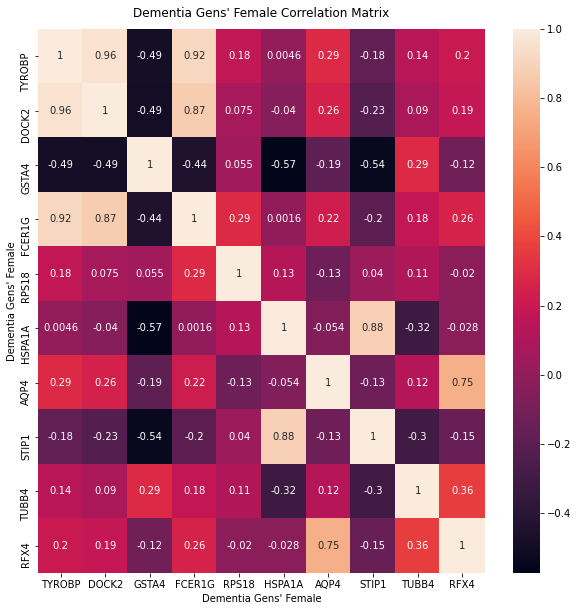

In [56]:
plt.figure(figsize=(10, 10))
htmap_alzFe = sn.heatmap(gene_Matrix_alzFe_Corr, annot=True)
htmap_alzFe.set_title("Dementia Gens' Female Correlation Matrix", fontdict={'fontsize':12}, pad=12);
htmap_alzFe.set_xlabel("Dementia Gens' Female")
htmap_alzFe.set_ylabel("Dementia Gens' Female")
plt.show()

#### Step 3

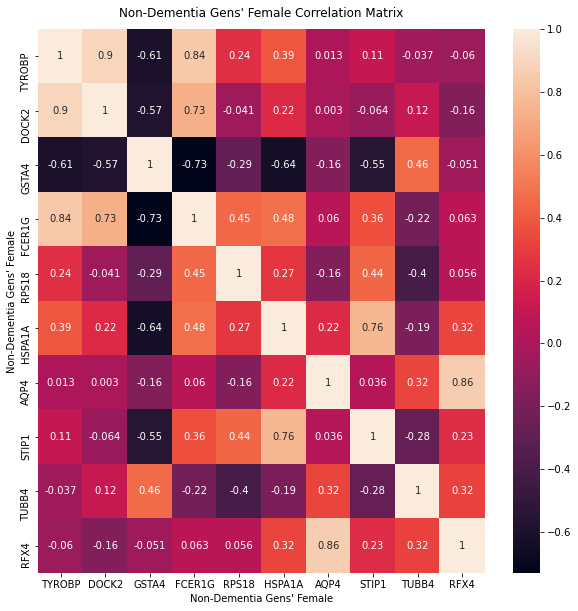

In [55]:
Data_ndFe = pd.read_csv(Data_File_Path + 'GSE44768_CR_nd_female_reduced.csv')
excluding_list = Data_alzFe.columns.get_indexer(["TYROBP", "DOCK2", "GSTA4"])
gene_Matrix_ndFe = Data_ndFe.iloc[: , [*excluding_list,*selcet_Other_7_column]]
gene_Matrix_nd_Corr = gene_Matrix_ndFe.corr()
plt.figure(figsize=(10, 10))
htmap_ndFe = sn.heatmap(gene_Matrix_nd_Corr, annot=True)
htmap_ndFe.set_title("Non-Dementia Gens' Female Correlation Matrix", fontdict={'fontsize':12}, pad=12);
htmap_ndFe.set_xlabel("Non-Dementia Gens' Female")
htmap_ndFe.set_ylabel("Non-Dementia Gens' Female")
plt.show()

#### Step 4

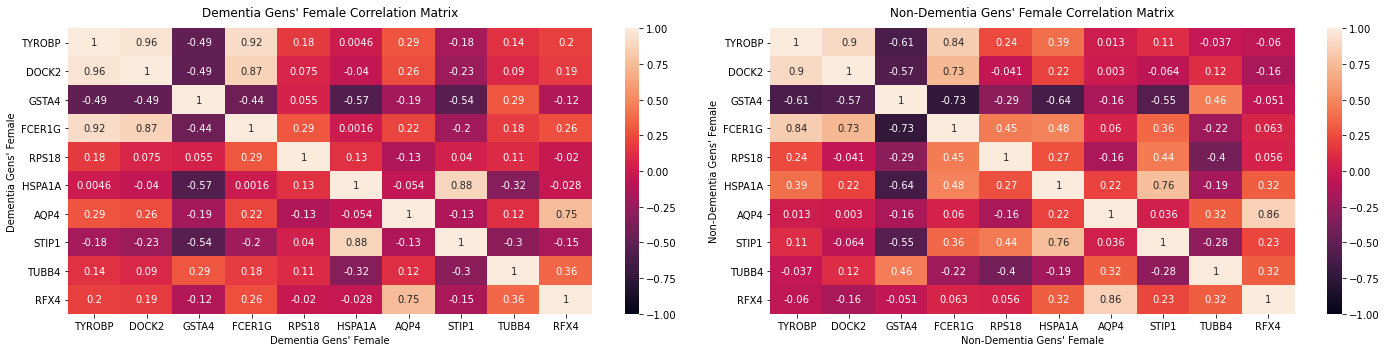

In [57]:
fig = plt.figure(figsize = (20, 5))
htmap_alzFe = plt.subplot2grid((1,2),(0,0))
htmap_alzFe = sn.heatmap(gene_Matrix_alzFe_Corr, vmin=-1, vmax=1, annot=True)
htmap_alzFe.set_title("Dementia Gens' Female Correlation Matrix", fontdict={'fontsize':12}, pad=12);
htmap_alzFe.set_xlabel("Dementia Gens' Female")
htmap_alzFe.set_ylabel("Dementia Gens' Female")

htmap_ndFe = plt.subplot2grid((1,2),(0,1))
htmap_ndFe = sn.heatmap(gene_Matrix_nd_Corr, vmin=-1, vmax=1, annot=True)
htmap_ndFe.set_title("Non-Dementia Gens' Female Correlation Matrix", fontdict={'fontsize':12}, pad=12);
htmap_ndFe.set_xlabel("Non-Dementia Gens' Female")
htmap_ndFe.set_ylabel("Non-Dementia Gens' Female")
fig.tight_layout()
plt.show()

#### Step 5

 To ease the study, I created a delta table to compare the dementia gene correlation relative to the non-dementia gene correlation and created a delta heatmap as shown in the figure below. I filtered all correlation data that are either above 40% differences or below -40%. Those genes have at least 40% difference expression in dementia cases relative to the non-dementia cases.
Based on the 40% criteria, it looks like the gene expression correlation in the following genes would be a good candidate for hypothesizing that these genes' expression may contribute to Alzheimer's disease:
- FCER1G vs HSPA1A
- FCER1G vs STIP1
- RPS18 vs STIP1
- RPS18 vs TUBB4

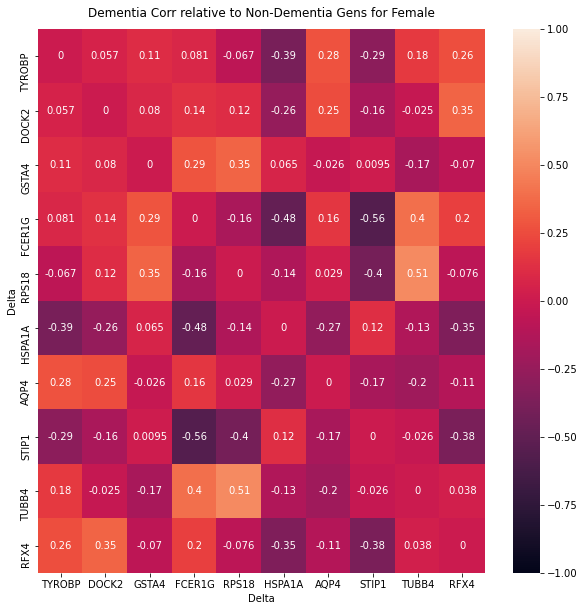

In [58]:
delta_Corr_alz_rel_nd = gene_Matrix_alzFe_Corr - gene_Matrix_nd_Corr
plt.figure(figsize=(10, 10))
htmap_ndFe = sn.heatmap(delta_Corr_alz_rel_nd,  vmin=-1, vmax=1, annot=True)
htmap_ndFe.set_title("Dementia Corr relative to Non-Dementia Gens for Female", fontdict={'fontsize':12}, pad=12);
htmap_ndFe.set_xlabel("Delta")
htmap_ndFe.set_ylabel("Delta")
plt.show()

In [59]:
delta_Corr_alz_rel_nd_reduced = delta_Corr_alz_rel_nd.where(delta_Corr_alz_rel_nd.lt(-0.4) | delta_Corr_alz_rel_nd.gt(0.4)).fillna('-')#, inplace=True)
delta_Corr_alz_rel_nd_reduced

,TYROBP,DOCK2,GSTA4,FCER1G,RPS18,HSPA1A,AQP4,STIP1,TUBB4,RFX4
TYROBP,-,-,-,-,-,-,-,-,-,-
DOCK2,-,-,-,-,-,-,-,-,-,-
GSTA4,-,-,-,-,-,-,-,-,-,-
FCER1G,-,-,-,-,-,-0.477821,-,-0.556633,-,-
RPS18,-,-,-,-,-,-,-,-0.400204,0.509746,-
HSPA1A,-,-,-,-0.477821,-,-,-,-,-,-
AQP4,-,-,-,-,-,-,-,-,-,-
STIP1,-,-,-,-0.556633,-0.400204,-,-,-,-,-
TUBB4,-,-,-,-,0.509746,-,-,-,-,-
RFX4,-,-,-,-,-,-,-,-,-,-


### Part IV: Review of Histogram/Boxplot/Violinplot

#### Step 1

Used histogram from matplotlib

Text(0.5, 0, 'TYROBP')

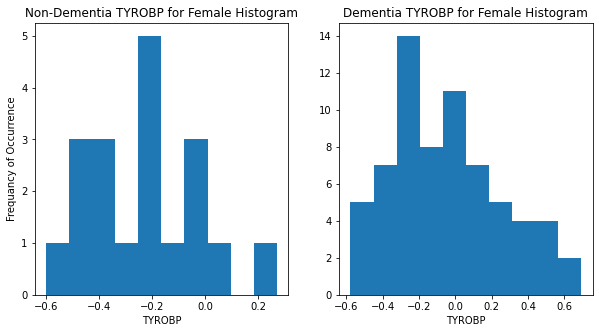

In [60]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot2grid((1,2),(0,0))
ax2 = plt.subplot2grid((1,2),(0,1))
ax1.hist(Data_ndFe.TYROBP)
ax1.set_title("Non-Dementia TYROBP for Female Histogram")
ax1.set_xlabel('TYROBP')
ax1.set_ylabel('Frequancy of Occurrence')
ax2.hist(Data_alzFe.TYROBP)
ax2.set_title("Dementia TYROBP for Female Histogram")
ax2.set_xlabel('TYROBP')
#sns.displot(data=tips, x="total_bill", col="time", kde=True)
#plt.show()

Alternatively I used histogram from seaborn:

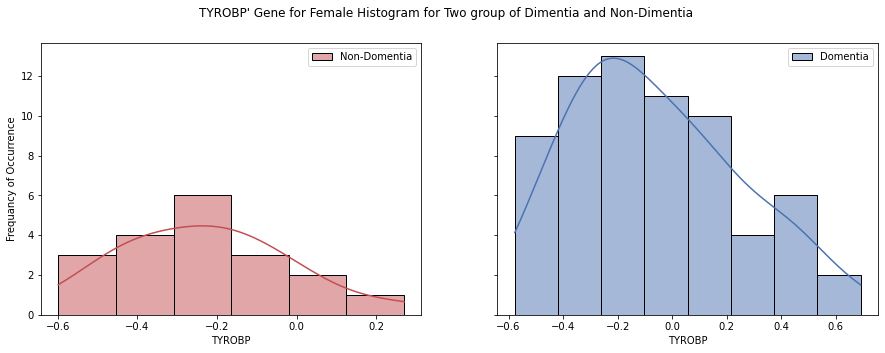

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle("TYROBP' Gene for Female Histogram for Two group of Dimentia and Non-Dimentia")
sn.set_color_codes()
sn.histplot(ax=axes[0], x=Data_ndFe.TYROBP, kde=True, label='Non-Domentia',color='r' ).legend()
#axes[0].set_title('Non-Domentia')
axes[0].set_xlabel('TYROBP')
axes[0].set_ylabel('Frequancy of Occurrence')
sn.histplot(ax=axes[1], x=  Data_alzFe.TYROBP, kde=True,  color='b', label='Domentia').legend()
#axes[1].set_title('Domentia')
axes[1].set_xlabel('TYROBP');


Also used dist plot with kde = True to see the normalized verstion

#### Step 2

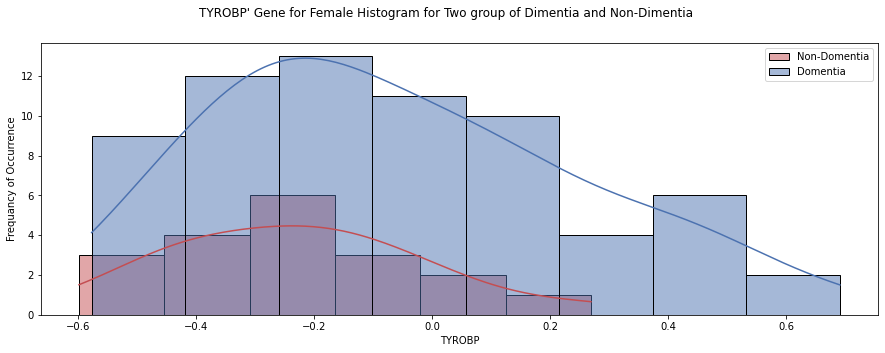

In [62]:
fig, axes = plt.subplots(figsize=(15, 5), sharey=True)
fig.suptitle("TYROBP' Gene for Female Histogram for Two group of Dimentia and Non-Dimentia")

sn.histplot(x=Data_ndFe.TYROBP, kde=True, label='Non-Domentia',color='r' ).legend()
sn.histplot(x=Data_alzFe.TYROBP, kde=True,  color='b', label='Domentia').legend()
axes.set_xlabel('TYROBP')
axes.set_ylabel('Frequancy of Occurrence')
plt.show()

#### Step 3

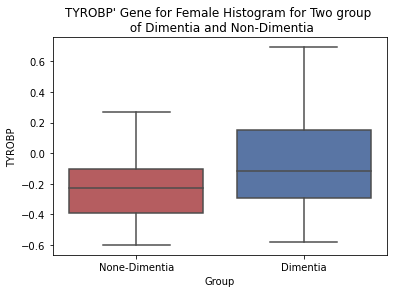

In [63]:
Data_ndFe.loc[:,'Group'] = 'None-Dimentia'
Data_alzFe.loc[:,'Group'] = 'Dimentia'
cdf = pd.concat([Data_ndFe,Data_alzFe])
my_pal = {"None-Dimentia": "r", "Dimentia": "b"}
ti = "TYROBP' Gene for Female Histogram for Two group \n of Dimentia and Non-Dimentia"
sn.boxplot(x=cdf.Group, y=cdf.TYROBP, palette=my_pal).set(title=ti);

#### Step 4

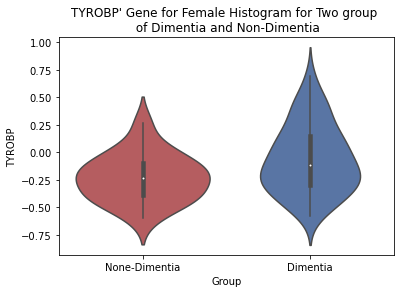

In [64]:
sn.violinplot(x=cdf.Group, y=cdf.TYROBP, palette=my_pal).set(title=ti);

#### Step 5

The distribution of the gene expression level is more or less the same. However, the mean is shifted. The standard deviation is larger in dementia cases relative to the non-dementia cases, which means the data in the dementia cases are more spread than in non-dementia cases. 
We may use the TYROBP in non-dementia as a baseline to set some higher and lower sigma bands. If any data is above this band can be a good candidate for hypothesizing if the patients are subjected to Alzheimer's disease. 

In [ ]:
#alternative solution
# genelist : TYROBP, DOCK2, GSTA4, ABCC2, ACBD5, LMAN1, KIFAP3, PCTK2, SNCA, RPS27
df = pd.read_csv("./GSE44768_CR_nd_female_reduced.csv",usecols=['TYROBP','DOCK2','GSTA
4',"ABCC2","ACBD5","LMAN1","KIFAP3","PCTK2","SNCA","RPS27"])
corrMatrix2 = df.corr()
print (corrMatrix2)
sn.heatmap(corrMatrix2, annot=False)
plt.title("Heat map of correlation coefficient between 10 genes")
plt.show()


SyntaxError: EOL while scanning string literal (<ipython-input-1-9860000d1035>, line 3)